In [91]:
import os
import glob
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [92]:
variables = ["phyc", "temperature", "salinity", "o2", "no3", "po4"]

dict_vars = {}
for var in variables:
    print(f"Processing variable: {var}")
    filename = "ctd.nc" if var in ["temperature", "salinity"] else "ctd_bgc.nc"
    grp_dirs = sorted(
        glob.glob(os.path.expanduser(f"../data/GROUP*/results/{filename}"))
    )

    var_values = []
    times = []

    tmp = {}
    for nc_path in grp_dirs:
        ds = xr.open_dataset(nc_path).isel(obs=0)  # surface only

        # extract variable values and time
        var_values.append(ds[var].values.flatten())
        times.append(ds["time"].values[0])

    # organise to dict
    tmp["values"], tmp["time"] = var_values, times

    # master dict
    dict_vars[var] = tmp

plot_dict = {
    "phyc": {
        "label": "Phytoplankton",
        "units": "mmol m$^{-3}$",
        "color": "forestgreen",
    },
    "temperature": {
        "label": "Temperature",
        "units": "°C",
        "color": "crimson",
    },
    "salinity": {
        "label": "Salinity",
        "units": "PSU",
        "color": "lightseagreen",
    },
    "o2": {
        "label": "Oxygen",
        "units": "mmol m$^{-3}$",
        "color": "dodgerblue",
    },
    "no3": {
        "label": "Nitrate",
        "units": "mmol m$^{-3}$",
        "color": "darkorchid",
    },
    "po4": {
        "label": "Phosphate",
        "units": "mmol m$^{-3}$",
        "color": "coral",
    },
}


combined_vars = [v for v in variables if v not in ["no3", "po4"]] + ["no3_po4"]


Processing variable: phyc
Processing variable: temperature
Processing variable: salinity
Processing variable: o2
Processing variable: no3
Processing variable: po4


In [95]:
# configs
LINES = False
VARIABILITY = False
BOX = False

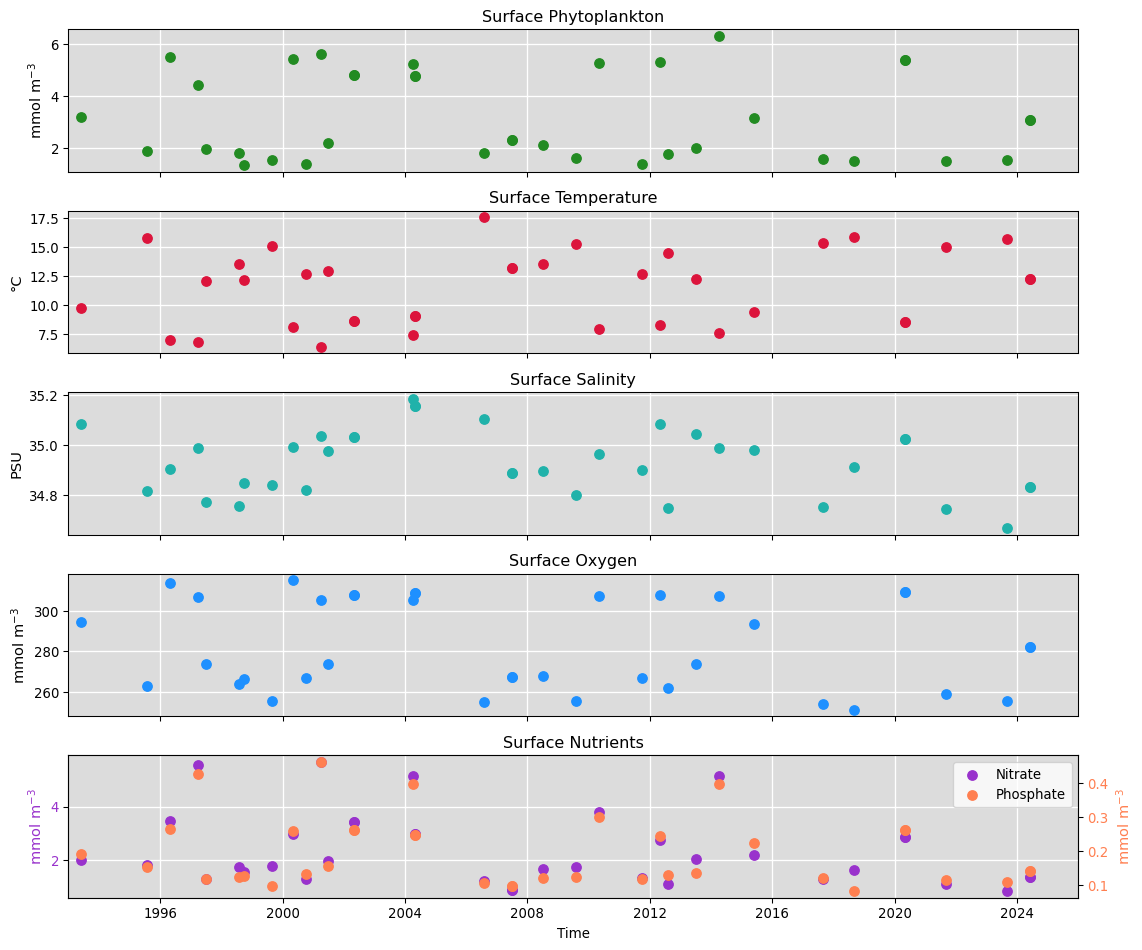

In [97]:
fig, axs = plt.subplots(
    len(combined_vars), 1, figsize=(12, 10), dpi=96, sharex=True, sharey=False
)

MARKERSIZE = 50
ERRMARKERSIZE = 6
BOXWIDTH = 200

for i, ax in enumerate(axs):
    if i < len(combined_vars) - 1:
        var = combined_vars[i]
        color = plot_dict[var]["color"]

        times = dict_vars[var]["time"]
        data = [np.nanmedian(values) for values in dict_vars[var]["values"]]

        # Sort all arrays by times
        sort_idx = np.argsort(times)
        times = np.array(times)[sort_idx]
        data = np.array(data)[sort_idx]

        if BOX:
            ax.boxplot(
                [dict_vars[var]["values"][j] for j in sort_idx],
                positions=mdates.date2num(times),
                widths=BOXWIDTH,
                boxprops=dict(color=color),
                whiskerprops=dict(color=color),
                capprops=dict(color=color),
                medianprops=dict(color=color),
                showfliers=False,
            )

        else:
            if VARIABILITY:
                ax.errorbar(
                    times,
                    data,
                    yerr=[np.nanstd(values) for values in dict_vars[var]["values"]],
                    fmt='o',
                    color=color,
                    markersize=ERRMARKERSIZE,
                    zorder=3,
                )
            else:
                ax.scatter(
                    times,
                    data,
                    color=color,
                    s=MARKERSIZE,
                zorder = 3,
            )

        if LINES:
            ax.plot(
                times,
                data,
                linestyle="dotted",
                alpha=1.0,
                color=color,
                lw=2.25,
            )

        ax.set_title(f"Surface {plot_dict[var]['label']}", fontsize=12)
        ax.set_ylabel(plot_dict[var]["units"], fontsize=11)
    else:
        color_no3 = plot_dict["no3"]["color"]
        color_po4 = plot_dict["po4"]["color"]

        no3_data = [np.nanmean(values) for values in dict_vars["no3"]["values"]]
        po4_data = [np.nanmean(values) for values in dict_vars["po4"]["values"]]
        # sort by times
        no3_data = np.array(no3_data)[sort_idx]
        po4_data = np.array(po4_data)[sort_idx]

        if BOX:
            ax.boxplot(
                [dict_vars["no3"]["values"][j] for j in sort_idx],
                positions=mdates.date2num(times),
                widths=BOXWIDTH,
                boxprops=dict(color=color_no3),
                whiskerprops=dict(color=color_no3),
                capprops=dict(color=color_no3),
                medianprops=dict(color=color_no3),
                showfliers=False,
                label = plot_dict["no3"]["label"],
            )

        else:
            if VARIABILITY:
                ax.errorbar(
                    times,
                    no3_data,
                    yerr=[np.nanstd(values) for values in dict_vars["no3"]["values"]],
                    fmt='o',
                    color=color_no3,
                    markersize=ERRMARKERSIZE,
                    label = plot_dict["no3"]["label"],
                    zorder=3,
                )
            else:
                ax.scatter(
                    times,
                    no3_data,
                    color=color_no3,
                    s=MARKERSIZE,
                    label = plot_dict["no3"]["label"],  
                    zorder = 3,
            )
        
        if LINES:
            ax.plot(
                times,
                no3_data,
                linestyle="dotted",
                alpha=1.0,
                color=color_no3,
                lw=2.25,
            )

        ax.set_ylabel(plot_dict["no3"]["units"], fontsize=11, color=color_no3)
        ax.tick_params(axis="y", labelcolor=color_no3)

        ax2 = ax.twinx()
        if BOX:
            ax2.boxplot(
                [dict_vars["po4"]["values"][j] for j in sort_idx],
                positions=mdates.date2num(times),
                widths=BOXWIDTH,
                boxprops=dict(color=color_po4),
                whiskerprops=dict(color=color_po4),
                capprops=dict(color=color_po4),
                medianprops=dict(color=color_po4),
                showfliers=False,
                label = plot_dict["po4"]["label"],
            )

        else:
            if VARIABILITY:
                ax2.errorbar(
                    times,
                    po4_data,
                    yerr=[np.nanstd(values) for values in dict_vars["po4"]["values"]],
                    fmt='o',
                    color=color_po4,
                    markersize=ERRMARKERSIZE,
                    label=plot_dict["po4"]["label"],
                    zorder=3,
                )
            else:
                ax2.scatter(
                    times,
                    po4_data,
                    color=color_po4,
                    s=MARKERSIZE,
                    label=plot_dict["po4"]["label"],
                zorder = 3,
            )

        if LINES:
            ax2.plot(
                times,
                po4_data,
                linestyle="dotted",
                alpha=1.0,
                color=color_po4,
                lw=2.25,
            )

        ax2.set_ylabel(plot_dict["po4"]["units"], fontsize=11, color=color_po4)
        ax2.tick_params(axis="y", labelcolor=color_po4)

        ax.set_title("Surface Nutrients", fontsize=12)

        handles, labels = [], []
        for a in [ax, ax2]:
            h, l = a.get_legend_handles_labels()
            handles += h
            labels += l
        ax.legend(handles, labels, loc="upper right")


    if BOX:
        date_range = np.arange(times[0], times[-1], dtype='datetime64[Y]')
        interval = 2
        ax.set_xticks(mdates.date2num(date_range)[::interval])
        ax.set_xticklabels(date_range[::interval])
    else:
        ax.set_xlim(np.datetime64("1993-01-01"), np.datetime64("2025-12-31"))

    if i == len(axs) - 1:  # bottom panel only for single column of subplots
        ax.set_xlabel("Time")

    ax.set_facecolor("gainsboro")
    ax.grid(color="white", linewidth=1.0)

# plt.suptitle('Surface only: Area-averaged time series across all groups', fontsize=14)
plt.tight_layout()
plt.show()